# Project 2

# Section 1: Dataset

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
tennis = pd.read_csv("atp_tennis.csv")
tennis.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,score
0,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mayer F.,Giraldo S.,Mayer F.,28,57,1215,778,1.36,3.00,6-4 6-4
1,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Benneteau J.,Nieminen J.,Nieminen J.,35,41,1075,927,2.20,1.61,3-6 6-2 1-6
2,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Nishikori K.,Matosevic M.,Nishikori K.,19,49,1830,845,1.25,3.75,7-5 6-2
3,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mitchell B.,Baghdatis M.,Baghdatis M.,326,36,137,1070,9.00,1.07,4-6 4-6
4,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,Klizan M.,Istomin D.,43,30,897,1175,1.90,1.80,6-1 6-2


# Section 2: Exploratory Data Analysis

I want to study the US Open from 2017 - 2023. I am making a new dataset to sort this for only the US Open, and then only from the years 2017 - 2023. 

In [5]:
df = tennis[tennis["Tournament"] == "US Open"]
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,score
2064,US Open,2013-08-26,Grand Slam,Outdoor,Hard,1st Round,5,Evans D.,Nishikori K.,Evans D.,179,12,269,2405,8.00,1.08,6-4 6-4 6-2
2065,US Open,2013-08-26,Grand Slam,Outdoor,Hard,1st Round,5,Bedene A.,Tursunov D.,Tursunov D.,106,34,513,1190,4.50,1.18,5-7 6-4 3-6 0-6
2066,US Open,2013-08-26,Grand Slam,Outdoor,Hard,1st Round,5,Tomic B.,Ramos A.,Tomic B.,52,75,870,695,1.25,3.75,6-3 3-6 4-6 7-6 6-3
2067,US Open,2013-08-26,Grand Slam,Outdoor,Hard,1st Round,5,Struff J.L.,Rufin G.,Rufin G.,96,91,563,589,3.50,1.28,6-7 3-6 6-2 6-2 1-6
2068,US Open,2013-08-26,Grand Slam,Outdoor,Hard,1st Round,5,Lopez F.,Serra F.,Lopez F.,26,206,1435,223,1.12,6.00,6-7 6-2 6-3 6-3


From doing some research, I learned that the two favorites for the US Open 2024 is Novak Djokovic and Carlos Alcaraz. So, I will be studying both of these players statistics from the past few years. I am only going to use the past 5 years because Alcaraz is a young player and has only been at his peek for the past few years, so it would be unfair to include the stats from a long time ago that made him look worse than he is now. Djokovic is older, but he has been in his prime years now, so excluding the earlier years will not effect his odds too much. Since the date in the dataframe includes the actual day, I did not want to use a normal conditional to sort this and have to write out all the dates after 2017, so I learned how to make this column into a date format to sort it easier using the pd.to_datetime function.

In [205]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df['Date'].dtype)

print(df['Date'].isnull().sum())

non_datetime_values = df[pd.to_datetime(df['Date'], errors='coerce').isnull()]
print(non_datetime_values)

# Filter data for the years 2017 to 2023
filtered_data = df[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2023)]
filtered_data

datetime64[ns]
0
Empty DataFrame
Columns: [Tournament, Date, Series, Court, Surface, Round, Best of, Player_1, Player_2, Winner, Rank_1, Rank_2, Pts_1, Pts_2, Odd_1, Odd_2, score]
Index: []


/var/folders/0d/0y77hbpd08n8x7sfp06kvfmc0000gn/T/ipykernel_15492/775020849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,score
12501,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Dutra Silva R.,Mayer F.,Mayer F.,453,74,86,688,2.62,1.50,5-7 6-0 3-6 4-6
12502,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Edmund K.,Haase R.,Edmund K.,42,36,1082,1168,1.90,1.90,6-3 7-5 6-3
12503,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,King E.,Carreno Busta P.,Carreno Busta P.,308,19,160,2225,8.00,1.08,3-6 2-6 6-7
12504,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Chung H.,Zeballos H.,Chung H.,47,58,992,823,1.25,4.00,3-6 7-6 6-4 6-3
12505,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Almagro N.,Johnson S.,Johnson S.,92,46,590,1000,6.00,1.12,4-6 6-7 6-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24132,US Open,2022-09-07,Grand Slam,Outdoor,Hard,Quarterfinals,5,Tiafoe F.,Rublev A.,Tiafoe F.,26,11,1400,3120,2.00,1.80,7-6 7-6 6-4
24133,US Open,2022-09-08,Grand Slam,Outdoor,Hard,Quarterfinals,5,Sinner J.,Alcaraz C.,Alcaraz C.,13,4,3020,5100,2.30,1.61,3-6 7-6 7-6 5-7 3-6
24134,US Open,2022-09-09,Grand Slam,Outdoor,Hard,Semifinals,5,Ruud C.,Khachanov K.,Ruud C.,7,31,4695,1315,1.44,2.75,7-6 6-2 5-7 6-2
24135,US Open,2022-09-10,Grand Slam,Outdoor,Hard,Semifinals,5,Tiafoe F.,Alcaraz C.,Alcaraz C.,26,4,1400,5100,2.62,1.50,7-6 3-6 1-6 7-6 3-6


In [206]:
df1 = filtered_data
df1

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,score
12501,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Dutra Silva R.,Mayer F.,Mayer F.,453,74,86,688,2.62,1.50,5-7 6-0 3-6 4-6
12502,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Edmund K.,Haase R.,Edmund K.,42,36,1082,1168,1.90,1.90,6-3 7-5 6-3
12503,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,King E.,Carreno Busta P.,Carreno Busta P.,308,19,160,2225,8.00,1.08,3-6 2-6 6-7
12504,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Chung H.,Zeballos H.,Chung H.,47,58,992,823,1.25,4.00,3-6 7-6 6-4 6-3
12505,US Open,2017-08-28,Grand Slam,Outdoor,Hard,1st Round,5,Almagro N.,Johnson S.,Johnson S.,92,46,590,1000,6.00,1.12,4-6 6-7 6-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24132,US Open,2022-09-07,Grand Slam,Outdoor,Hard,Quarterfinals,5,Tiafoe F.,Rublev A.,Tiafoe F.,26,11,1400,3120,2.00,1.80,7-6 7-6 6-4
24133,US Open,2022-09-08,Grand Slam,Outdoor,Hard,Quarterfinals,5,Sinner J.,Alcaraz C.,Alcaraz C.,13,4,3020,5100,2.30,1.61,3-6 7-6 7-6 5-7 3-6
24134,US Open,2022-09-09,Grand Slam,Outdoor,Hard,Semifinals,5,Ruud C.,Khachanov K.,Ruud C.,7,31,4695,1315,1.44,2.75,7-6 6-2 5-7 6-2
24135,US Open,2022-09-10,Grand Slam,Outdoor,Hard,Semifinals,5,Tiafoe F.,Alcaraz C.,Alcaraz C.,26,4,1400,5100,2.62,1.50,7-6 3-6 1-6 7-6 3-6


Now I am going to find some information on the two players I am studying.

In [207]:
#Djokovic avg rank
djok_rank_1 = df1[df1["Player_1"] == "Djokovic N."]["Rank_1"].mean()
djok_rank_2 = df1[df1["Player_2"] == "Djokovic N."]["Rank_2"].mean()

djok_rank = (djok_rank_1 + djok_rank_2) / 2

print(f"Average Rank of Djokovic N.: {djok_rank}")

Average Rank of Djokovic N.: 2.7857142857142856


In [208]:
#Alcaraz avg rank

alc_rank_1 = df1[df1["Player_1"] == "Alcaraz C."]["Rank_1"].mean()
alc_rank_2 = df1[df1["Player_2"] == "Alcaraz C."]["Rank_2"].mean()

alc_rank = (alc_rank_1 + alc_rank_2) / 2

print(f"Average Rank of Alcaraz C.: {alc_rank}")

Average Rank of Alcaraz C.: 25.128571428571426


In [209]:
#Djok avg points

djok_pts_1 = df1[df1["Player_1"] == "Djokovic N."]["Pts_1"].mean()
djok_pts_2 = df1[df1["Player_2"] == "Djokovic N."]["Pts_2"].mean()

djok_pts = (djok_pts_1 + djok_pts_2) / 2

print(f"Average Points of Djokovic N.: {djok_pts}")

Average Points of Djokovic N.: 8792.464285714286


In [210]:
#Alcaraz avg points

alc_pts_1 = df1[df1["Player_1"] == "Alcaraz C."]["Pts_1"].mean()
alc_pts_2 = df1[df1["Player_2"] == "Alcaraz C."]["Pts_2"].mean()

alc_pts = (alc_pts_1 + alc_pts_2) / 2

print(f"Average Points of Alcaraz C.: {alc_pts}")

Average Points of Alcaraz C.: 3488.0142857142855


In [211]:
#djok avg odds

djok_odds_1 = df1[df1["Player_1"] == "Djokovic N."]["Odd_1"].mean()
djok_odds_2 = df1[df1["Player_2"] == "Djokovic N."]["Odd_2"].mean()

djok_odds = (djok_odds_1 + djok_odds_2) / 2

print(f"Average Odds of Djokovic N.: {djok_odds}")

Average Odds of Djokovic N.: 1.0927678571428572


In [212]:
#Alcaraz avg odds

alc_odds_1 = df1[df1["Player_1"] == "Alcaraz C."]["Odd_1"].mean()
alc_odds_2 = df1[df1["Player_2"] == "Alcaraz C."]["Odd_2"].mean()

alc_odds = (alc_odds_1 + alc_odds_2) / 2

print(f"Average Odds of Alcaraz: {alc_odds}")

Average Odds of Alcaraz: 1.8572857142857142


Based on the results of my studies, Djokovic, who has the record for most weeks at the world no. 1 spot obviously beats Alcaraz in that aspect. Djokovic also has a lower number (which is better) for odds, but slightly. 

In [213]:
# % of djok winning

df_won_djok = df1[df1['Winner'] == 'Djokovic N.']

total_matches = len(df1)
djok_wins = len(df_won_djok)

percentage_won_djok = (djok_wins / total_matches) * 100

print(f"% of matches won by Djokovic: {percentage_won_djok}%")


% of matches won by Djokovic: 2.4967148488830486%


In [214]:
# % of alc winning

df_won_alc = df1[df1['Winner'] == 'Alcaraz C.']

alc_wins = len(df_won_alc)

percentage_win_alc = (alc_wins / total_matches) * 100

print(f"% of matches won by Alcaraz: {percentage_win_alc}%")

% of matches won by Alcaraz: 1.445466491458607%


I was just curious to see the difference between the two, because Djokovic has dominated the US Open for past decade. This reflects on the data I calculated, as I figured out the percent of matches won by Djokovic was almost double Alcaraz. 

The histograms for player rank show that most of the participants are within the top 100 players in the world due to the histogram being extremely skewed to the right. The histograms for player odds also display the extreme skewedness to the right, and this shows a high frequency of players having low odds to win a match. This is due to the beginning rounds in which highly ranked/seeded players face low ranked/unseeded players. As the tournament progresses, the odds will become lower and lower as the better players advance, but since less matches are played in the later rounds, the frequency of high odds decreases as well. 

In [215]:
data = ['Rank_1', 'Rank_2', 'Odd_1', 'Odd_2']

for feature in data:
    mean = df1[feature].mean()
    median = df1[feature].median()
    std = df1[feature].std()
    
    print(f"{feature} mean: {mean}")

    print(f"{feature} median: {median}")
    
    print(f"{feature} standard deviation: {std}")

Rank_1 mean: 73.42969776609723
Rank_1 median: 53.0
Rank_1 standard deviation: 101.44874573704232
Rank_2 mean: 68.2904073587385
Rank_2 median: 52.0
Rank_2 standard deviation: 76.2680420412608
Odd_1 mean: 3.208206307490144
Odd_1 median: 2.0
Odd_1 standard deviation: 3.6277966574278073
Odd_2 mean: 3.328199737187911
Odd_2 median: 1.8
Odd_2 standard deviation: 3.9134885221096716


The high STD of both rank columns show how spread out the ranking values are. But then the STD of the odds are low, which means that they are clustered around the mean. The rank mean is so high because even though the higher rankings win sometimes, there are always underdogs or young players who have to be ranked low to be built up. 

# Section 3: Exploratory Data Visualization

<Axes: ylabel='Frequency'>

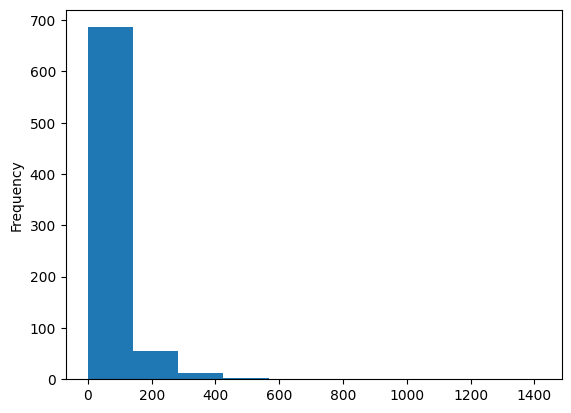

In [216]:

df1["Rank_1"].plot.hist()

 

<Axes: ylabel='Frequency'>

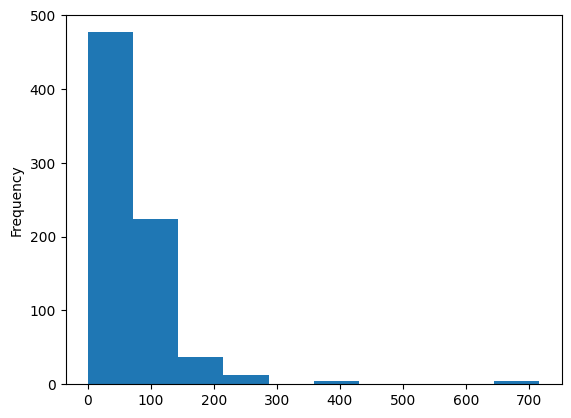

In [217]:
df1["Rank_2"].plot.hist()


<Axes: ylabel='Frequency'>

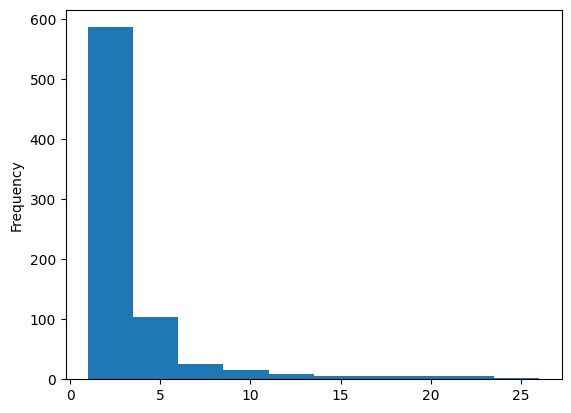

In [218]:
df1["Odd_1"].plot.hist()

<Axes: ylabel='Frequency'>

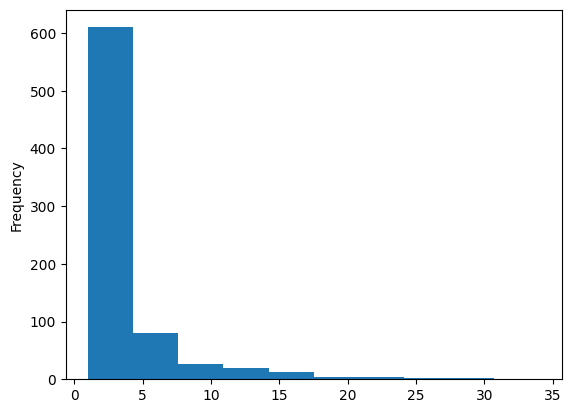

In [219]:
df1["Odd_2"].plot.hist()

I decided to look at the rank for histograms first. The histograms show that most of the players are within the top 100 players in the world, besides a few outliers. The histograms for player odds also shows skewdness, and this shows a higher frequency for players having lower odds to win a match. This is because at the beginning of the tournament, highly seeded players are matched to play low seeded players. The later on in the tournament, the odds will become lower and lower as the better players advance.

# Section 4: Data Science


I want to predict who will win between these two!! lets see! 

In [220]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

features = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']
X = df1[features]
y = df1['Winner']

model_logistic = LogisticRegression()

model_logistic.fit(X, y)

new_data = pd.DataFrame({
    'Rank_1': [2.7857142857142856],
    'Rank_2': [25.128571428571426],
    'Pts_1': [8792.464285714286],
    'Pts_2': [3488.0142857142855],
    'Odd_1': [1.0927678571428572],
    'Odd_2': [1.8572857142857142]
}) 

predicted_winner = model_logistic.predict(new_data)
print(f"Predicted Winner: {predicted_winner[0]}")


Predicted Winner: Djokovic N.


/Users/madelynmcnamara/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In the beginning of the study, I had hopes to create a machine learning model to predict who would win between Djokovic and Alcaraz based on the current data in this dataset. When I was looking for a dataset, I came across a dataset that did a very similar thing between two other players and studied similar stats from a different dataset. This study gave me some inspiration on what to do for mine. 

I first started by uploading the dataset, which is a huge dataset including every mens ATP tournament since 2013. I then downsized it to just study the data from the tournament from the US Open. After this, after looking at the top two favorites for the US Open in 2024, I saw it was Carlos Alcaraz, who is a young new player who is just hitting his peek, and then Novak Djokovic, who has been dominating mens tennis for over 10 years now. I realized it would not be fair to study data from years before Alcaraz's years in these tournaments, being that Djokovic has been playing for those years. I decided to cut the dataset even more to only be from the US Open from 2017-2023. I then used the ranks, odds, and points columns to find the average for all of these for each player. I then found the mean, median, and standard deviation for each of these columns too. This helped me confirm I did the calculations above correct, because seeing the STD being so big confirms that there is a big difference in rank, and rank does not always matter when deciding who will win. After this, I created histograms for the ranks and the odds for the players. I learned through the histograms that most of the people who qualify for the US Open tournament is in the top 100.


I then pulled this all together to use linear regression to predict the winner of this match. I used machine learning to predict the winner. After looking at the different types of regression, I learned that Logistic Regression is the best option for this test, because the answer is either one or the other: Djokovic or Alcaraz. I basically used what we learned in class about linear regression modelling and applied it to logistic regression. After inputing all the data I calculated before, I was able to predict who was going to win if they played each other. Now, this prediction is not perfect, it isn't including injuries, age, weather, or any other circumstance that could change the outcome. Djokovic is predicted to win!


Looking back at my project, I am thinking of things I could have done differently. I think I could have instead of only the US Open stats used data from all the tournaments that were on a 'hard' court, being that they are pretty much the same. This would have provided me more data, especially on Alcaraz, who is just making a break, so there is only very new data on him. Overall, I think I did a relatively accurate study and analysis, and I guess I will have to see if my prediction is correct in the 2024 US Open!!